In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [23]:
df_train = pd.read_csv("../df_train_pso.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,Rhythm,PatientAge,Gender,Rcount_lead1,RRInterval_mean_lead1,RRInterval_std_lead1,QT_intervals_var_lead1,PR_intervals_mean_lead1,PR_segment_mean_lead1,PR_segment_var_lead1,...,Qcount_lead11,ST_segment_mean_lead11,Rcount_lead12,RRInterval_median_lead12,RRInterval_range_lead12,RRInterval_skew_lead12,RRInterval_kurtosis_lead12,R_peaks_amplitude_from_isoelectric_mean_lead12,Qcount_lead12,PR_segment_mean_lead12
0,3,0.456183,1,2.313163,0.381475,0.041064,0.000019,0.124970,-0.618281,0.001515,...,29.0,-0.184178,2.314183,0.380859,0.058467,1.456159,1.804519,0.764069,30.0,0.002074
1,0,1.402339,1,1.044654,0.880707,1.874749,0.000000,1.715935,4.769596,2.236628,...,4.0,1.225579,1.045115,0.873007,1.882629,0.025357,-1.223340,3.526872,3.0,0.996510
2,1,1.368548,1,0.671563,1.334546,0.250454,0.002375,2.122088,4.074030,0.087646,...,7.0,1.489339,0.671860,1.341661,0.233867,-0.752008,-0.916225,1.287138,7.0,4.491185
3,1,0.844783,0,0.671563,1.262942,0.276685,0.429776,0.884404,-1.402173,0.225874,...,8.0,1.803774,0.746511,1.261285,3.391071,-2.440756,4.027672,1.151314,8.0,3.592259
4,0,1.115113,1,0.671563,1.391335,8.379536,0.589014,2.523434,7.364169,2.511923,...,8.0,1.826430,0.671860,1.293435,7.881317,0.684815,-0.853637,2.071577,6.0,4.468224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,2,1.351652,0,0.895418,1.001106,0.341096,2.768143,1.071422,1.228532,0.882024,...,11.0,1.354048,0.895813,1.001609,0.339107,-0.250734,-1.102293,0.693319,11.0,-0.473416
8512,0,1.081322,1,1.044654,0.851458,1.631888,3.190118,1.323401,3.282778,0.342559,...,1.0,-0.409284,1.045115,0.855695,1.917709,0.372443,-0.373761,2.989072,4.0,-1.494766
8513,2,0.067583,0,1.044654,0.854877,0.987437,0.399927,0.780878,0.896847,0.087124,...,10.0,0.960356,1.045115,0.885373,0.935468,-0.553992,-1.246738,0.667144,10.0,1.099376
8514,1,0.642035,1,0.671563,1.249054,0.722168,0.425762,0.586398,-0.971584,0.360905,...,7.0,1.286971,0.746511,1.276124,0.818534,-1.033128,0.224218,1.014954,9.0,5.496880


In [24]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [25]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [26]:
df_test = pd.read_csv("../df_test_psos.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,Rhythm,PatientAge,Gender,Rcount_lead1,RRInterval_mean_lead1,RRInterval_std_lead1,QT_intervals_var_lead1,PR_intervals_mean_lead1,PR_segment_mean_lead1,PR_segment_var_lead1,...,Qcount_lead11,ST_segment_mean_lead11,Rcount_lead12,RRInterval_median_lead12,RRInterval_range_lead12,RRInterval_skew_lead12,RRInterval_kurtosis_lead12,R_peaks_amplitude_from_isoelectric_mean_lead12,Qcount_lead12,PR_segment_mean_lead12
0,0,1.436130,1,1.790836,0.489525,1.005687,1.136613,0.667261,1.324888,0.497929,...,11.0,0.426137,1.791626,0.489675,1.052401,-0.009576,-1.247569,1.980089,10.0,0.458073
1,0,1.182696,1,0.820800,1.116772,3.179971,0.619290,1.695107,4.784317,1.824051,...,7.0,1.443657,0.821162,1.081985,3.964045,1.644825,2.326858,0.828798,8.0,2.576232
2,2,0.726513,0,0.820800,1.141216,0.361658,0.204018,1.083074,1.236562,0.446568,...,10.0,1.211109,0.821162,1.145049,0.327414,-0.079076,-1.543403,0.794161,4.0,0.892038
3,1,1.098217,1,0.671563,1.287325,0.175123,0.629861,0.908436,-0.121448,1.277346,...,2.0,0.848128,0.671860,1.284780,0.187094,0.910720,-0.450520,1.107166,8.0,-1.458602
4,1,0.692722,0,0.746182,1.280363,0.338447,0.636173,0.954099,0.451443,1.742526,...,9.0,1.690343,0.746511,1.278597,0.362494,0.275635,-1.027188,0.405492,9.0,0.650946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,0,1.165800,0,1.343127,0.677113,3.219273,1.376637,1.200434,2.473124,0.497239,...,14.0,0.285295,1.343719,0.586127,3.262444,0.953688,-0.590095,0.951139,17.0,1.301893
2126,0,1.250278,1,1.492363,0.588944,1.094960,0.293431,0.935673,2.257216,0.448087,...,13.0,0.574858,1.493021,0.566342,1.192722,2.522238,4.465922,0.750163,15.0,0.762725
2127,1,0.895469,0,0.671563,1.289177,0.474791,0.019671,1.619805,2.572491,0.042581,...,2.0,1.800850,0.671860,1.290962,0.479427,0.356419,-0.924803,0.809545,3.0,8.582848
2128,1,1.334756,1,0.596945,1.426785,0.318640,0.351651,0.590518,-0.656135,0.365226,...,7.0,1.470499,0.597209,1.422037,0.268947,0.074376,-1.533974,0.843326,7.0,-0.220426


In [27]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [28]:
x_test = scale.transform(x_test)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.5, shuffle=True, stratify=y_train, random_state=119)
print(f"Train: {x_train.shape}")
print(f"Vallidation: {x_val.shape}")

Train: (4258, 106)
Vallidation: (4258, 106)


In [ ]:
x_train

In [30]:
# rf_clf = RandomForestClassifier(criterion= 'log_loss', max_depth= 5, max_features= 'sqrt', n_estimators= 1000)
ab_clf = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 50)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')
svc_clf = SVC(C= 100, gamma= 'scale', kernel= 'rbf', probability= True)
xgb_clf = XGBClassifier(gamma= 0,learning_rate= 0.1,max_depth= 5,min_child_weight= 1,n_estimators= 1000)
dt_clf = DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,max_features= 'sqrt',splitter= 'best')

In [31]:
# Huấn luyện các mô hình con
# rf_clf.fit(x_train,y_train)
ab_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
dt_clf.fit(x_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [32]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    # rf_clf.predict_proba(x_val),
    ab_clf.predict_proba(x_val),
    knn_clf.predict_proba(x_val),
    svc_clf.predict_proba(x_val),
    xgb_clf.predict_proba(x_val),
    dt_clf.predict_proba(x_val)
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    # rf_clf.predict_proba(x_test),
    ab_clf.predict_proba(x_test),
    knn_clf.predict_proba(x_test),
    svc_clf.predict_proba(x_test),
    xgb_clf.predict_proba(x_test),
    dt_clf.predict_proba(x_test)
))

In [33]:
print(f"X_train_meta:{X_train_meta.shape}")
print(f"X_test_meta:{X_test_meta.shape}")

X_train_meta:(4258, 20)
X_test_meta:(2130, 20)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
params = {
    'n_estimators': [10,50,100,1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3,4,5],
    'max_features':['sqrt', 'log2'],
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_val)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=(train=0.952, test=0.954) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=(train=0.959, test=0.953) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=10;, score=(train=0.960, test=0.952) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=50;, score=(train=0.956, test=0.961) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=50;, score=(train=0.958, test=0.952) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=50;, score=(train=0.963, test=0.949) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=100;, score=(train=0.956, test=0.962) total time=   0.2s
[CV 2/3] END criterion=gini

In [35]:
result_test = grid_model.predict(X_test_meta)

In [36]:
grid_model.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [37]:
grid_model.best_score_

0.9584295294907808

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

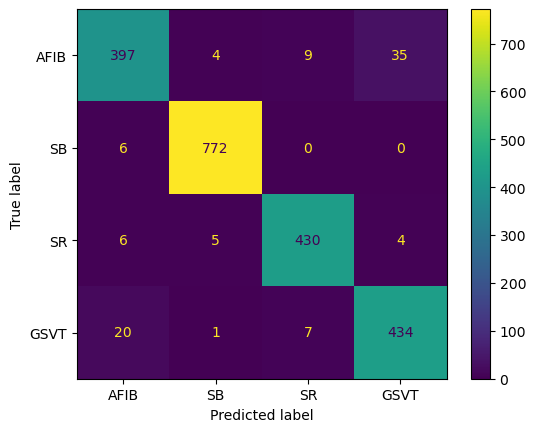

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.962441,0.892135,0.925408,0.908467,0.981009
1,SB,0.992488,0.992288,0.987212,0.989744,0.992604
2,SR,0.985446,0.966292,0.964126,0.965208,0.990504
3,GSVT,0.968545,0.939394,0.917548,0.928342,0.976619
4,macro avg,NaN,0.947940,0.948573,0.947527,NaN
5,micro avg,NaN,0.954460,0.954460,0.954460,NaN
6,weighted avg,NaN,0.954319,0.954366,0.954460,NaN


In [39]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [40]:
# df_evaluation_test.to_csv("../Result/Blending_RF_182ft.csv")